In [1]:
pip install --user tensorflow-hub

  Using cached tensorflow_hub-0.16.1-py2.py3-none-any.whl.metadata (1.3 kB)
  Using cached tf_keras-2.19.0-py3-none-any.whl.metadata (1.8 kB)
Using cached tensorflow_hub-0.16.1-py2.py3-none-any.whl (30 kB)
Using cached tf_keras-2.19.0-py3-none-any.whl (1.7 MB)

Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install opencv-python

  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl (39.5 MB)


In [3]:
import numpy as np
import cv2
import PIL.Image as Image
import os
import matplotlib.pylab as plt
import tensorflow as tf
from tensorflow import keras  # Import keras directly from tensorflow
import tensorflow_hub as hub
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [8]:
import tf_keras as tfk

In [10]:
IMAGE_SHAPE = (128, 128)

classifier = tfk.Sequential([
    hub.KerasLayer("https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/035-128-classification/2", input_shape=IMAGE_SHAPE+(3,))
])

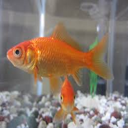

In [14]:
gold_fish = Image.open("goldfish.jpg").resize(IMAGE_SHAPE)
gold_fish

In [15]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(128, 128, 3)

In [18]:
gold_fish[np.newaxis, ...].shape  #the reason we added the "newaxis, ..." line is to add a new axis in case of prediction, since prediction takes beyond
                                  #just one image. It takes in multiple images and inputs

(1, 128, 128, 3)

In [21]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result

1/1 [==============================] - 0s 75ms/step


array([[ 0.4118986 ,  2.7163818 , 14.573518  , ...,  1.4027132 ,
         0.42137158,  0.5304203 ]], dtype=float32)

In [22]:
result.shape

(1, 1001)

In [23]:
predicted_label_index = np.argmax(result) #gives me the index of the prediction with the maximum value
predicted_label_index

np.int64(2)

### From the above, we see that the prediction with index 2 is the highest, with a value of 14.573518

In [25]:
image_labels = []
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

["{0: 'tench, Tinca tinca',",
 " 1: 'goldfish, Carassius auratus',",
 " 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',",
 " 3: 'tiger shark, Galeocerdo cuvieri',",
 " 4: 'hammerhead, hammerhead shark',"]

In [26]:
image_labels[predicted_label_index]

" 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',"

In [27]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)  #'.' as my cache URL means that the dataset 
                                                                                    #will be saved in my current working directory, and I can change the 
                                                                                    #directory with another path if I want to.

                                                                                    #'untar=True; is for unzipping files


In [28]:
data_dir

'.\\datasets\\flower_photos'

In [29]:
import pathlib
data_dir = '.\\datasets\\flower_photos\\flower_photos'  # Add another 'flower_photos' to take care of the 'flower_photos' subfolder
data_dir = pathlib.Path(data_dir)
print(data_dir)

datasets\flower_photos\flower_photos


In [30]:
image_count = len(list(data_dir.glob('*/*.jpg'))) #Gives a list of all files in the directory with a .jpg extension
image_count

3670

In [34]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [38]:
import PIL

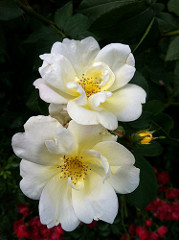

In [39]:
PIL.Image.open(str(roses[0]))

In [40]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [41]:
flowers_labels_dict = {
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4,
}    

In [43]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [44]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(240, 179, 3)

In [45]:
cv2.resize(img,IMAGE_SHAPE).shape

(128, 128, 3)

In [47]:
X, y = [], []
for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, IMAGE_SHAPE)
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [48]:
X[0]

array([[[ 3, 18,  9],
        [ 3, 18, 10],
        [ 4, 20,  9],
        ...,
        [22, 46, 27],
        [23, 49, 31],
        [25, 52, 33]],

       [[12, 22, 14],
        [11, 21, 14],
        [ 8, 21, 11],
        ...,
        [22, 45, 30],
        [21, 43, 31],
        [25, 47, 35]],

       [[14, 21, 15],
        [12, 20, 13],
        [10, 21, 11],
        ...,
        [17, 39, 27],
        [21, 45, 27],
        [22, 46, 27]],

       ...,

       [[ 8, 20, 12],
        [ 9, 19, 10],
        [ 4, 12,  2],
        ...,
        [ 5, 16,  6],
        [ 7, 12,  7],
        [ 0,  4,  2]],

       [[16, 27, 22],
        [12, 21, 14],
        [15, 23, 13],
        ...,
        [ 6, 15,  5],
        [ 3, 11,  3],
        [ 0,  5,  0]],

       [[14, 24, 23],
        [18, 26, 22],
        [18, 26, 17],
        ...,
        [ 3, 11,  4],
        [ 2, 11,  2],
        [ 2,  9,  3]]], dtype=uint8)

In [53]:
X = np.array(X)
y = np.array(y)

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [55]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [56]:
X_train_scaled

array([[[[0.24705882, 0.28627451, 0.2745098 ],
         [0.25098039, 0.2627451 , 0.23921569],
         [0.21176471, 0.21176471, 0.21176471],
         ...,
         [0.19215686, 0.15686275, 0.14509804],
         [0.18823529, 0.15294118, 0.14117647],
         [0.19215686, 0.15294118, 0.14509804]],

        [[0.22745098, 0.23137255, 0.22352941],
         [0.24705882, 0.24705882, 0.22352941],
         [0.22745098, 0.21960784, 0.21568627],
         ...,
         [0.19215686, 0.15686275, 0.14509804],
         [0.18823529, 0.15294118, 0.14117647],
         [0.19607843, 0.16078431, 0.14901961]],

        [[0.25490196, 0.24313725, 0.22745098],
         [0.23137255, 0.24313725, 0.21960784],
         [0.22745098, 0.22745098, 0.21176471],
         ...,
         [0.19215686, 0.15686275, 0.14509804],
         [0.19215686, 0.15686275, 0.14509804],
         [0.19607843, 0.16078431, 0.14901961]],

        ...,

        [[0.22352941, 0.47058824, 0.39215686],
         [0.23529412, 0.43137255, 0.36078431]

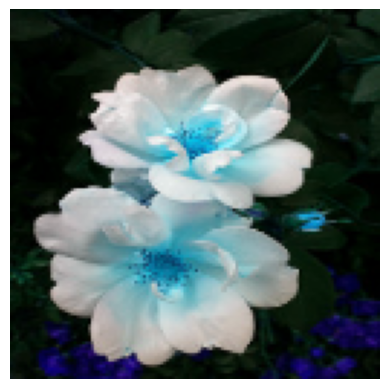

In [57]:
plt.axis('off') #This helps me such that it doesn't show my x and y axes
plt.imshow(x[0])

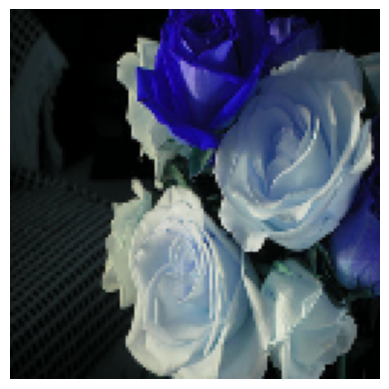

In [58]:
plt.axis('off') #This helps me such that it doesn't show my x and y axes
plt.imshow(x[1])

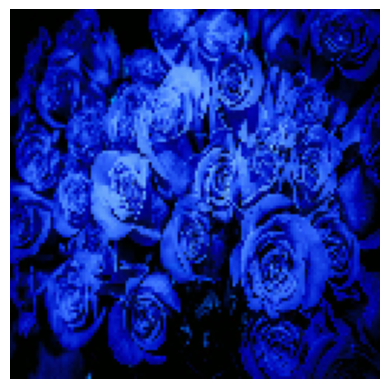

In [59]:
plt.axis('off') #This helps me such that it doesn't show my x and y axes
plt.imshow(x[2])

## Now, let's try to use the classifier from our pretrained model on the images

In [63]:
predicted = classifier.predict(np.array([X[0], X[1], X[2]]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 2s 2s/step


array([905, 410, 795])

In [64]:
image_labels[795]

" 795: 'ski',"

In [65]:
image_labels[905]

" 905: 'window shade',"

In [66]:
image_labels[410]

" 410: 'apiary, bee house',"

## Now, we obviously have to retrain the model

In [81]:
import tensorflow as tf

# Number of classes
num_of_flowers = 5

# IMPORTANT: Set input_shape to match your actual data (128x128x3)
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(128, 128, 3),  # Changed from 224x224 to 128x128
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False

# Create a new model
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(num_of_flowers)
])

# Compile the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

# Print summary to verify input shape
model.summary()

# Now the training should work
model.fit(X_train_scaled, y_train, epochs=5)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128 (Functional)    │ (None, 4, 4, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │           6,405 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,264,389 (8.64 MB)

 Trainable params: 6,405 (25.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 33s 238ms/step - acc: 0.5790 - loss: 1.0918
Epoch 2/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 238ms/step - acc: 0.8388 - loss: 0.4714
Epoch 3/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 240ms/step - acc: 0.8889 - loss: 0.3588
Epoch 4/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 240ms/step - acc: 0.9101 - loss: 0.2916
Epoch 5/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 229ms/step - acc: 0.9357 - loss: 0.2334


In [83]:
model.evaluate(X_test_scaled, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 238ms/step - acc: 0.8438 - loss: 0.5040


[0.47301629185676575, 0.8474945425987244]